In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense

Using Theano backend.


In [2]:
aapl = pd.read_csv('data/AAPL.csv', index_col = 'Date')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.023268
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.022054
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.020435
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.020941
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.021548


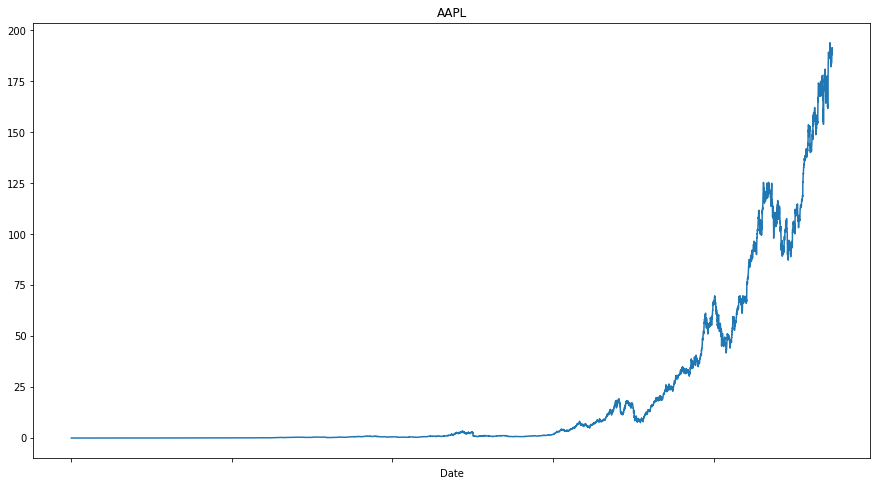

In [10]:
aapl['Adj Close'].plot(figsize=(15,8), title='AAPL');

In [4]:
aapl_mod = (aapl
            .assign(dif = lambda x: x['Adj Close'].diff())
            .dropna()
            .assign(target = lambda x: np.where(x.dif > 0, '1', '-1'))
            .drop(columns = ['dif'])
           )
aapl_mod.head()

,High,Low,Open,Close,Volume,Adj Close,target
Date,,,,,,,
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.022054,-1
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.020435,-1
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.020941,1
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.021548,1
1980-12-19,0.506696,0.504464,0.504464,0.504464,12157600.0,0.022863,1


In [5]:
aapl_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9479 entries, 1980-12-15 to 2018-07-18
Data columns (total 7 columns):
High         9479 non-null float64
Low          9479 non-null float64
Open         9479 non-null float64
Close        9479 non-null float64
Volume       9479 non-null float64
Adj Close    9479 non-null float64
target       9479 non-null object
dtypes: float64(6), object(1)
memory usage: 592.4+ KB
